In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [2]:
 df = pd.read_excel("customer_churn_large_dataset.xlsx")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [69]:
df1=df.drop(['CustomerID','Name','Gender','Location'], axis = 1)

In [70]:
df1.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,17.0,73.36,236.0,0.0
1,62.0,1.0,48.76,172.0,0.0
2,24.0,5.0,85.47,460.0,0.0
3,36.0,3.0,97.94,297.0,1.0
4,46.0,19.0,58.14,266.0,0.0


In [71]:
df1['Churn'].unique()

array([0., 1.])

In [72]:
df1.isnull().sum()

Age                           0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [79]:
x = df1.iloc[:,:-1]
y = df1.iloc[:, -1]

In [80]:
x

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,63.0,17.0,73.36,236.0
1,62.0,1.0,48.76,172.0
2,24.0,5.0,85.47,460.0
3,36.0,3.0,97.94,297.0
4,46.0,19.0,58.14,266.0
...,...,...,...,...
99995,33.0,23.0,55.13,226.0
99996,62.0,19.0,61.65,351.0
99997,64.0,17.0,96.11,251.0
99998,51.0,20.0,49.25,434.0


In [81]:
y

0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
99995    1.0
99996    0.0
99997    1.0
99998    1.0
99999    1.0
Name: Churn, Length: 100000, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [83]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [94]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1', 'l2', 'elasticnet',],  'max_iter':[100,200,300]}

In [95]:
classifier_regressor = GridSearchCV(classifier, param_grid = parameter, scoring = 'accuracy', cv=5)

In [96]:
classifier_regressor.fit(x_train,y_train)

C:\Users\Ranjan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ranjan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ranjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Ranjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [97]:
print(classifier_regressor.best_params_)

{'max_iter': 100, 'penalty': 'l2'}


In [98]:
print(classifier_regressor.best_score_)

0.5017333333333334


In [99]:
y_pred= classifier_regressor.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score, classification_report

In [102]:
score = accuracy_score(y_pred, y_test)
print(score)

0.50112


In [104]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60     18680
         1.0       0.25      0.50      0.33      6320

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.47     25000
weighted avg       0.62      0.50      0.53     25000



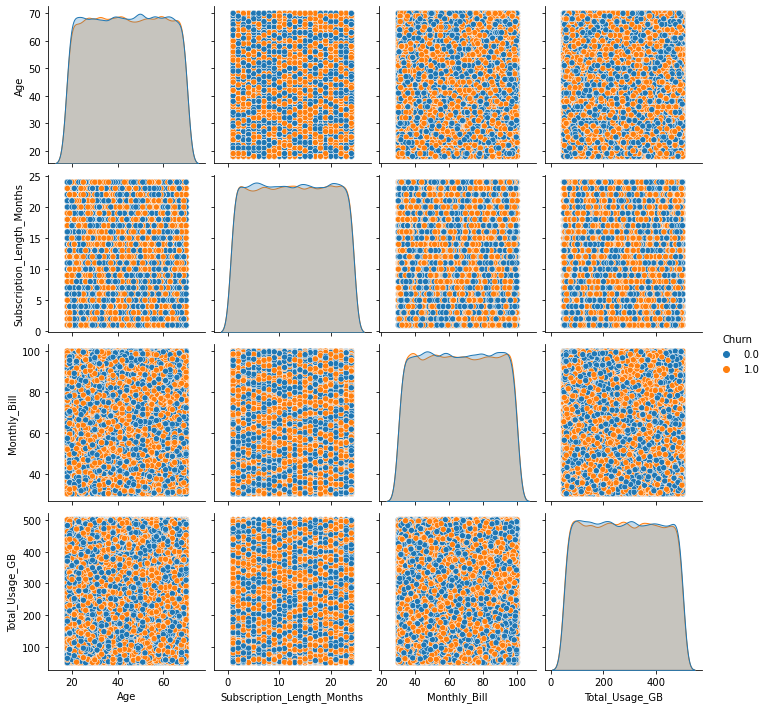

In [105]:
sns.pairplot(df1, hue='Churn')

In [106]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000
